In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('Desktop/ml/sign-language-mnist/sign_mnist_train.csv')
test = pd.read_csv('Desktop/ml/sign-language-mnist/sign_mnist_test.csv')

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
train.shape

(27455, 785)

In [5]:
labels = train['label'].values


In [6]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

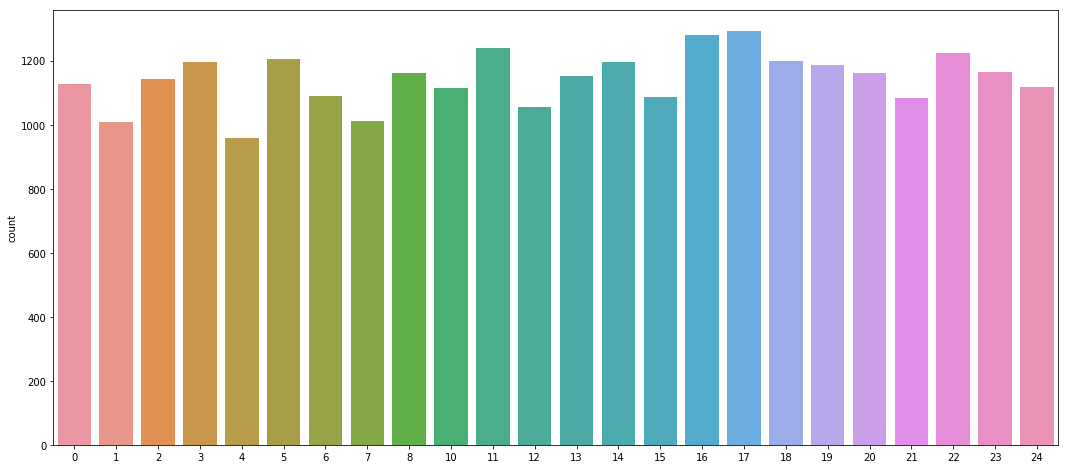

In [7]:
plt.figure(figsize = (18,8))
sns.countplot(x =labels)

In [8]:
train.drop('label', axis = 1, inplace = True)

In [9]:
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [10]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [11]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

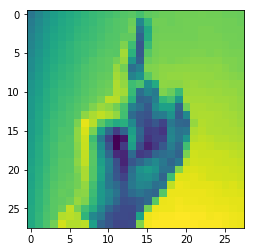

In [12]:
plt.imshow(images[0].reshape(28,28))

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

Using TensorFlow backend.


In [16]:
batch_size = 128
num_classes = 24
epochs = 50

In [17]:
x_train = x_train / 255
x_test = x_test / 255

In [18]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

In [19]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

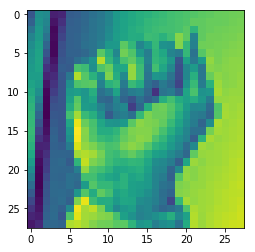

In [20]:
plt.imshow(x_train[0].reshape(28,28))


In [21]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.05))
model.add(Dense(num_classes, activation = 'softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
__________

In [22]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [23]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)


Train on 19218 samples, validate on 8237 samples
Epoch 1/50
19218/19218 [==============================] - 6s 301us/step - loss: 2.5420 - acc: 0.2251 - val_loss: 1.6047 - val_acc: 0.4810
Epoch 2/50
19218/19218 [==============================] - 4s 202us/step - loss: 1.1295 - acc: 0.6287 - val_loss: 0.7445 - val_acc: 0.7557
Epoch 3/50
19218/19218 [==============================] - 4s 214us/step - loss: 0.6213 - acc: 0.7884 - val_loss: 0.4973 - val_acc: 0.8308
Epoch 4/50
19218/19218 [==============================] - 4s 210us/step - loss: 0.3787 - acc: 0.8743 - val_loss: 0.2452 - val_acc: 0.9236
Epoch 5/50
19218/19218 [==============================] - 4s 206us/step - loss: 0.2245 - acc: 0.9304 - val_loss: 0.1556 - val_acc: 0.9590
Epoch 6/50
19218/19218 [==============================] - 4s 215us/step - loss: 0.1389 - acc: 0.9577 - val_loss: 0.0891 - val_acc: 0.9773
Epoch 7/50
19218/19218 [==============================] - 4s 209us/step - loss: 0.0860 - acc: 0.9778 - val_loss: 0.0514 - v

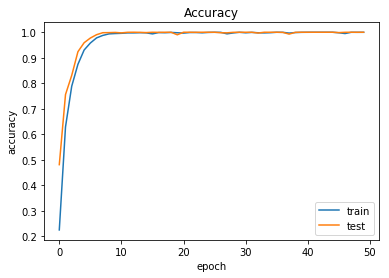

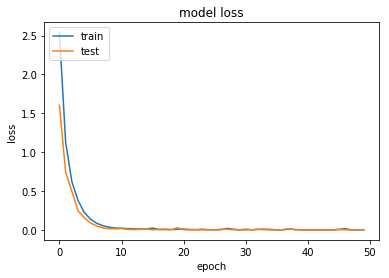

In [24]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
test_labels = test['label']


In [26]:
test.drop('label', axis = 1, inplace = True)

In [27]:
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

In [28]:
test_labels = label_binrizer.fit_transform(test_labels)

In [29]:
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [30]:
test_images.shape

(7172, 28, 28, 1)

In [31]:
y_pred = model.predict(test_images)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, y_pred.round())

0.8789737869492471